<a href="https://colab.research.google.com/github/abhyudaya29/Deep-Learning-cat-vs-dog/blob/main/vggnet_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras,os
from keras.models import Sequential
from keras.layers import Dense ,Flatten,Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
from keras.utils import to_categorical

x, y = oxflower17.load_data()

x_train = x.astype('float32') / 255.0
y_train = to_categorical(y, num_classes=17)

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [4]:
!pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=f3993d527d5a3f94b9c35219025103ac222c3b341f5819d08f2945b30d38e951
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [6]:
import gdown


In [7]:
# download the data from g drive

import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: /content/catdog.zip
100%|██████████| 9.09M/9.09M [00:00<00:00, 60.0MB/s]


'catdog.zip'

In [8]:
!unzip catdog.zip

Archive:  catdog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/cat.2405.jpg  
  inflating: train/Cat/cat.2406.jpg  
  inflating: train/Cat/cat.2436.jpg  
  inflating: train/Cat/cat.2437.jpg  
  inflating: train/Cat/cat.2438.jpg  
  inflating: train/Cat/cat.2439.jpg  
  inflating: train/Cat/cat.2440.jpg  
  inflating: train/Cat/cat.2441.jpg  
  inflating: train/Cat/cat.2442.jpg  
  inflating: train/Cat/cat.2443.jpg  
  inflating: train/Cat/cat.2444.jpg  
  inflating: train/Cat/cat.2445.jpg  
  inflating: train/Cat/cat.2446.jpg  
  inflating: train/Cat/cat.2447.jpg  
  inflating: train/Cat/cat.2448.jpg  
  inflating: train/Cat/cat.2449.jpg  
  inflating: train/Cat/cat.2450.jpg  
  inflating: train/Cat/cat.2451.jpg  
  inflating: train/Cat/cat.2452.jpg  
  inflating: train/Cat/cat.2453.jpg  
  inflating: train/Cat/cat.2454.jpg  
  inflating: train/Cat/

In [55]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [56]:
train_ddata_dir="/content/train"
validation_data_dir="/content/validation"

In [57]:
num_train_sample=2000
num_validation_sample=800


In [58]:
epochs=5
batch_size=16

In [59]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))


In [60]:
for layer in base_model.layers:
  layer.trainable=False

In [61]:
model=Sequential()

In [62]:
model.add(base_model)

In [63]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [64]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [65]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_ddata_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=num_train_sample // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_validation_sample // batch_size)

Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Epoch 1/5
125/125 [==============================] - ETA: 0s - batch: 62.0000 - size: 15.4000 - loss: 2.5472 - acc: 0.9595

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


125/125 [==============================] - 13s 100ms/step - batch: 62.0000 - size: 15.4000 - loss: 2.5480 - acc: 0.9595 - val_loss: 4.2403 - val_acc: 0.9649
Epoch 2/5
125/125 [==============================] - 12s 98ms/step - batch: 62.0000 - size: 15.2800 - loss: 0.2374 - acc: 0.9942 - val_loss: 7.0740 - val_acc: 0.9135
Epoch 3/5
125/125 [==============================] - 12s 98ms/step - batch: 62.0000 - size: 15.2800 - loss: 0.1756 - acc: 0.9958 - val_loss: 0.9828 - val_acc: 0.9838
Epoch 4/5
125/125 [==============================] - 12s 98ms/step - batch: 62.0000 - size: 15.2800 - loss: 0.0755 - acc: 0.9990 - val_loss: 1.7381 - val_acc: 0.9838
Epoch 5/5
125/125 [==============================] - 12s 100ms/step - batch: 62.0000 - size: 15.4000 - loss: 0.0931 - acc: 0.9984 - val_loss: 1.3563 - val_acc: 0.9473


In [30]:
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

In [107]:
test_img=cv2.imread("/content/licensed-image.jpeg")

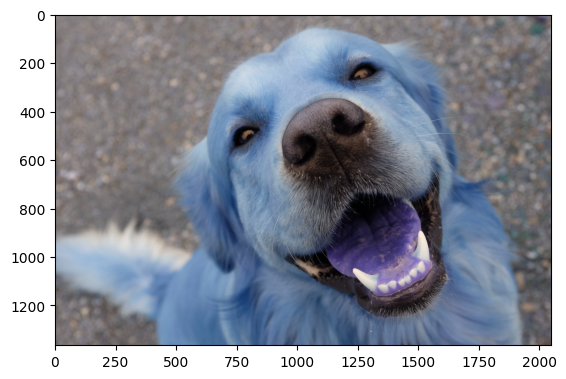

In [108]:
plt.imshow(test_img)

In [109]:
test_img.shape

(1365, 2048, 3)

In [110]:
test_img = cv2.resize(test_img,(224,224))

In [111]:
test_input = test_img.reshape((1,224,224,3))

In [112]:
model.predict(test_input)

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[1.]], dtype=float32)

TypeError: ignored

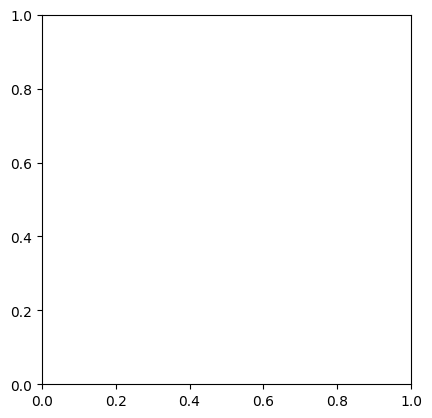